## Data Wrangling and Preprocessing Notebook

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Dataset Overview

In [2]:
df = pd.read_csv('Property_with_Feature_Engineering.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   price_bin      191393 non-null  object 
 6   location       191393 non-null  object 
 7   city           191393 non-null  object 
 8   province_name  191393 non-null  object 
 9   locality       191393 non-null  object 
 10  latitude       191393 non-null  float64
 11  longitude      191393 non-null  float64
 12  baths          191393 non-null  int64  
 13  area           191393 non-null  object 
 14  area_marla     191393 non-null  float64
 15  area_sqft      191393 non-null  float64
 16  purpose        191393 non-null  object 
 17  bedrooms       191393 non-nul

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


# 2. Data Cleaning

## Handling Missing Values

### Check for missing values

In [3]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
price_bin            0
location             0
city                 0
province_name        0
locality             0
latitude             0
longitude            0
baths                0
area                 0
area_marla           0
area_sqft            0
purpose              0
bedrooms             0
date_added           0
year                 0
month                0
day                  0
agency           47379
agent            47380
dtype: int64

only agency & agent columns have missing values, these columns will be dropped in upcoming steps

## Removing Duplicates

### Check for duplicates

In [4]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
191388    False
191389    False
191390    False
191391    False
191392    False
Length: 191393, dtype: bool

no duplicate values exist in the data set

## Handling Outliers

### Visualizing outliers using boxplot

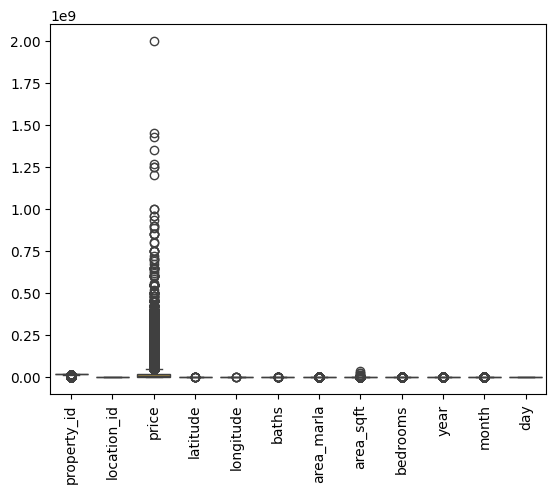

In [5]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

In [7]:
df = remove_outliers(df,'price')

# 3. Data Transformation

## Converting Data Types

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])

## Encoding Categorical Variables

In [9]:
df['property_type'] = df['property_type'].astype('category').cat.codes
df['city'] = df['city'].astype('category').cat.codes
df['province_name'] = df['province_name'].astype('category').cat.codes


## Creating New Variables

In [10]:
df['price_per_sqft'] = df['price'] / df['area_sqft']

In [11]:
location_price_map = df.groupby('location')['price'].mean().to_dict()
df['location_encoded'] = df['location'].map(location_price_map)

# 4. Normalization and Standardization

# 5. Dimensionality Reduction

In [ ]:
scaler = StandardScaler()  # Standardization
df[['price', 'area_sqft', 'bedrooms', 'baths','latitude','longitude']] = scaler.fit_transform(df[['price', 'area_sqft', 'bedrooms', 'baths','latitude','longitude']])

## dropping unnecesrary columns / Feature Selection

In [13]:
df = df.drop(columns=['location_id','price_bin','agency','agent','property_id','locality','purpose','page_url','area','area_marla','location'])

In [14]:
df.head()

,property_type,price,city,province_name,latitude,longitude,baths,area_sqft,bedrooms,date_added,year,month,day,price_per_sqft,location_encoded
1,2,2.943277,3,1,0.345703,0.842852,0.983697,0.015258,1.087241,2018-10-06,2018,10,6,7346.162181,8.059476e+06
2,2,0.037551,3,1,0.364362,0.920529,-1.160106,-0.008517,-0.001128,2019-07-03,2019,7,3,3877.139569,1.095206e+07
4,2,1.133152,3,1,0.366327,0.877609,0.983697,-0.004194,1.631426,2019-04-04,2019,4,4,7012.248060,1.228830e+07
6,2,0.704439,3,1,0.342849,0.877459,1.841218,-0.010678,1.631426,2019-07-03,2019,7,3,7575.722793,1.004084e+07
7,2,2.228754,3,1,0.348013,0.852589,-1.160106,0.015258,1.087241,2019-07-03,2019,7,3,5968.756772,1.650870e+07


In [15]:
df.shape

(174575, 15)

# 6. Data Validation
## Checking Data Accuracy and Consistency
## Check for any inconsistencies in the dataset

In [16]:
df.describe()

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,property_type,price,city,province_name,latitude,longitude,baths,area_sqft,bedrooms,date_added,year,month,day,price_per_sqft,location_encoded
count,174575.000000,1.745750e+05,174575.000000,174575.000000,1.745750e+05,1.745750e+05,1.745750e+05,1.745750e+05,1.745750e+05,174575,174575.000000,174575.000000,174575.000000,1.745750e+05,1.745750e+05
mean,2.280155,-2.083906e-17,2.244468,1.097167,1.510832e-16,-1.797369e-15,-9.198491e-18,5.718531e-18,-9.507821e-17,2019-05-26 22:26:55.365316096,2018.933965,6.222947,13.415432,inf,9.105850e+06
min,0.000000,-8.675117e-01,0.000000,0.000000,-5.266298e+00,-1.498041e+01,-1.160106e+00,-2.796920e-02,-1.633683e+00,2018-08-05 00:00:00,2018.000000,1.000000,1.000000,0.000000e+00,1.800000e+03
25%,2.000000,-8.613191e-01,1.000000,1.000000,-1.423966e+00,-1.452558e+00,-1.160106e+00,-1.759474e-02,-5.453133e-01,2019-05-06 00:00:00,2019.000000,6.000000,5.000000,2.633530e+01,6.965035e+06
50%,2.000000,-2.958934e-01,2.000000,1.000000,3.549788e-01,4.820054e-01,1.261758e-01,-1.283970e-02,-1.128426e-03,2019-06-28 00:00:00,2019.000000,7.000000,14.000000,4.810005e+03,9.544813e+06
75%,2.000000,5.138991e-01,3.000000,2.000000,9.308426e-01,8.543525e-01,5.549364e-01,-6.355666e-03,5.430564e-01,2019-07-11 00:00:00,2019.000000,7.000000,20.000000,7.713470e+03,1.113724e+07
max,6.000000,3.400571e+00,4.000000,2.000000,1.184349e+01,2.803455e+00,1.716304e+02,2.689395e+02,3.537089e+01,2019-08-06 00:00:00,2019.000000,12.000000,30.000000,inf,4.125000e+07
std,1.406139,1.000003e+00,1.081361,0.714664,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,NaN,0.248343,1.831932,8.448644,NaN,3.646934e+06


In [17]:
df.isnull().sum()

property_type       0
price               0
city                0
province_name       0
latitude            0
longitude           0
baths               0
area_sqft           0
bedrooms            0
date_added          0
year                0
month               0
day                 0
price_per_sqft      0
location_encoded    0
dtype: int64

# Export Cleaned Data

In [18]:
df.to_csv('cleaned_dataset.csv')

In [19]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.columns.tolist()

Dataset contains 174575 rows and 15 columns.


['property_type',
 'price',
 'city',
 'province_name',
 'latitude',
 'longitude',
 'baths',
 'area_sqft',
 'bedrooms',
 'date_added',
 'year',
 'month',
 'day',
 'price_per_sqft',
 'location_encoded']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174575 entries, 1 to 191392
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   property_type     174575 non-null  int8          
 1   price             174575 non-null  float64       
 2   city              174575 non-null  int8          
 3   province_name     174575 non-null  int8          
 4   latitude          174575 non-null  float64       
 5   longitude         174575 non-null  float64       
 6   baths             174575 non-null  float64       
 7   area_sqft         174575 non-null  float64       
 8   bedrooms          174575 non-null  float64       
 9   date_added        174575 non-null  datetime64[ns]
 10  year              174575 non-null  int64         
 11  month             174575 non-null  int64         
 12  day               174575 non-null  int64         
 13  price_per_sqft    174575 non-null  float64       
 14  location_

In [21]:
df.describe()

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,property_type,price,city,province_name,latitude,longitude,baths,area_sqft,bedrooms,date_added,year,month,day,price_per_sqft,location_encoded
count,174575.000000,1.745750e+05,174575.000000,174575.000000,1.745750e+05,1.745750e+05,1.745750e+05,1.745750e+05,1.745750e+05,174575,174575.000000,174575.000000,174575.000000,1.745750e+05,1.745750e+05
mean,2.280155,-2.083906e-17,2.244468,1.097167,1.510832e-16,-1.797369e-15,-9.198491e-18,5.718531e-18,-9.507821e-17,2019-05-26 22:26:55.365316096,2018.933965,6.222947,13.415432,inf,9.105850e+06
min,0.000000,-8.675117e-01,0.000000,0.000000,-5.266298e+00,-1.498041e+01,-1.160106e+00,-2.796920e-02,-1.633683e+00,2018-08-05 00:00:00,2018.000000,1.000000,1.000000,0.000000e+00,1.800000e+03
25%,2.000000,-8.613191e-01,1.000000,1.000000,-1.423966e+00,-1.452558e+00,-1.160106e+00,-1.759474e-02,-5.453133e-01,2019-05-06 00:00:00,2019.000000,6.000000,5.000000,2.633530e+01,6.965035e+06
50%,2.000000,-2.958934e-01,2.000000,1.000000,3.549788e-01,4.820054e-01,1.261758e-01,-1.283970e-02,-1.128426e-03,2019-06-28 00:00:00,2019.000000,7.000000,14.000000,4.810005e+03,9.544813e+06
75%,2.000000,5.138991e-01,3.000000,2.000000,9.308426e-01,8.543525e-01,5.549364e-01,-6.355666e-03,5.430564e-01,2019-07-11 00:00:00,2019.000000,7.000000,20.000000,7.713470e+03,1.113724e+07
max,6.000000,3.400571e+00,4.000000,2.000000,1.184349e+01,2.803455e+00,1.716304e+02,2.689395e+02,3.537089e+01,2019-08-06 00:00:00,2019.000000,12.000000,30.000000,inf,4.125000e+07
std,1.406139,1.000003e+00,1.081361,0.714664,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,NaN,0.248343,1.831932,8.448644,NaN,3.646934e+06


In [22]:
#Remove rows with price_per_sqft = inf

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['price_per_sqft'])


## Start EDA
### Univariate Analysis
Univariate Analysis for Numeric Columns

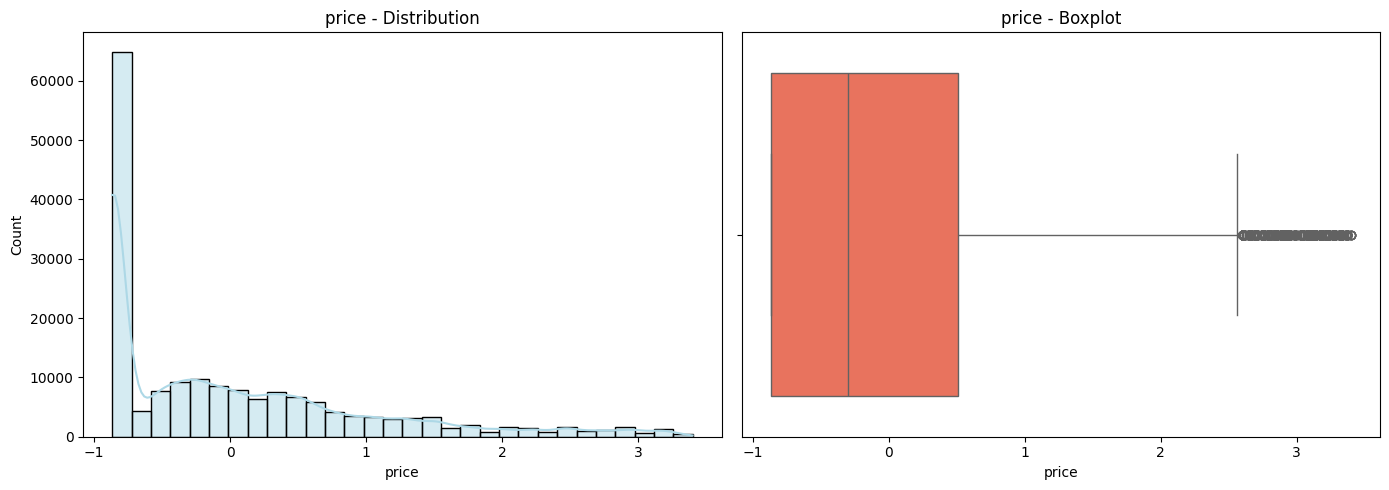


Summary Statistics for price:

count    174559.000000
mean          0.000012
std           1.000015
min          -0.867512
25%          -0.861319
50%          -0.295893
75%           0.513899
max           3.400571
Name: price, dtype: float64
------------------------------------------------------------


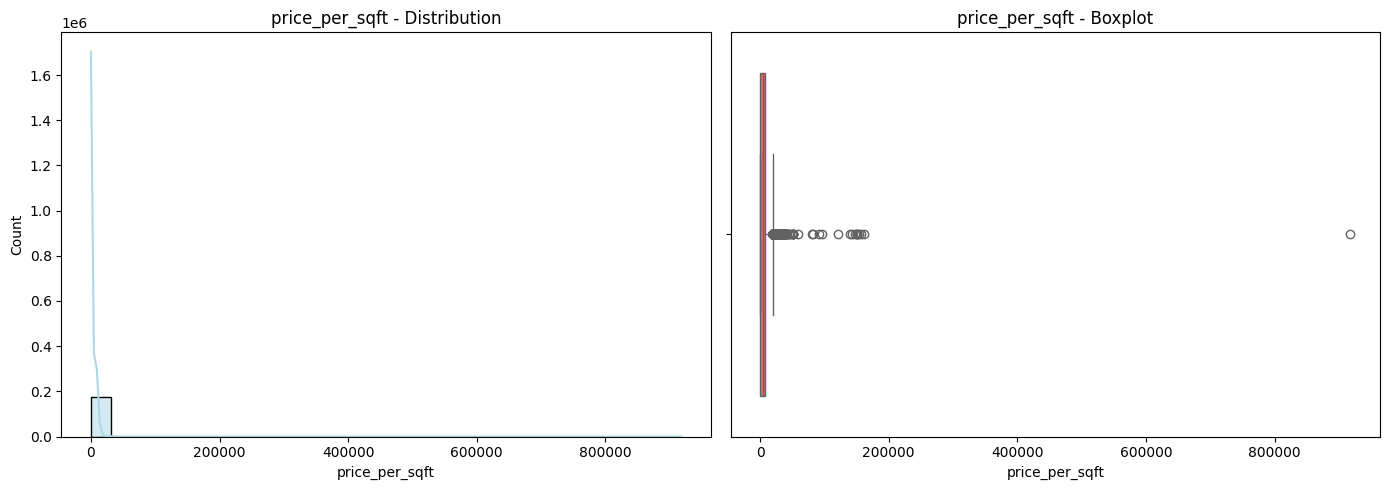


Summary Statistics for price_per_sqft:

count    174559.000000
mean       4710.101388
std        5177.647155
min           0.000000
25%          26.335304
50%        4810.004810
75%        7713.470290
max      918105.031216
Name: price_per_sqft, dtype: float64
------------------------------------------------------------


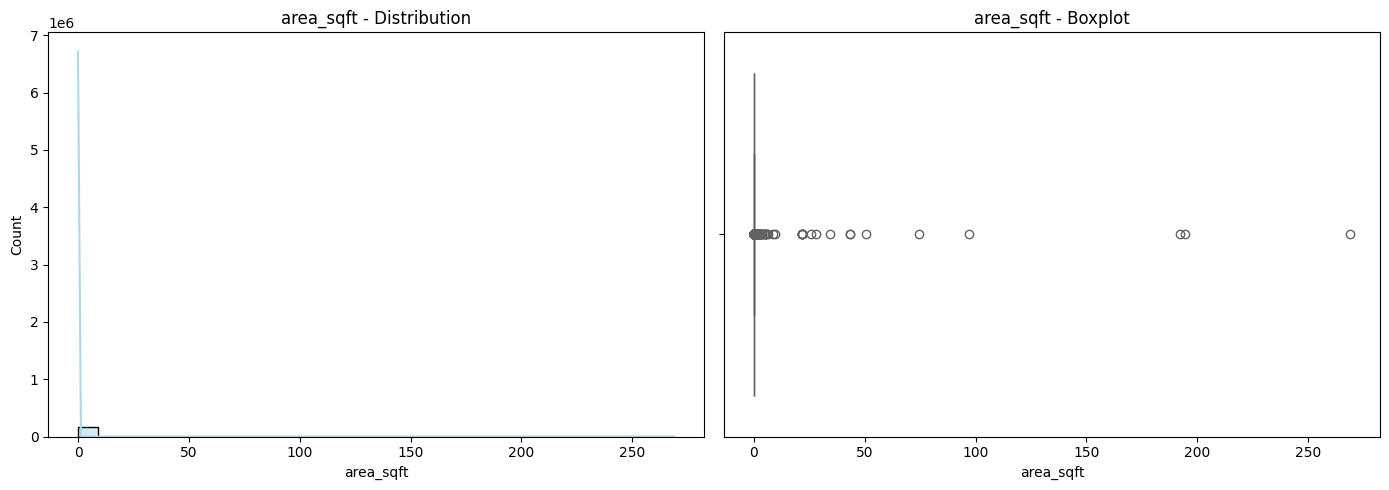


Summary Statistics for area_sqft:

count    174559.000000
mean          0.000003
std           1.000049
min          -0.027753
25%          -0.017595
50%          -0.012840
75%          -0.006356
max         268.939511
Name: area_sqft, dtype: float64
------------------------------------------------------------


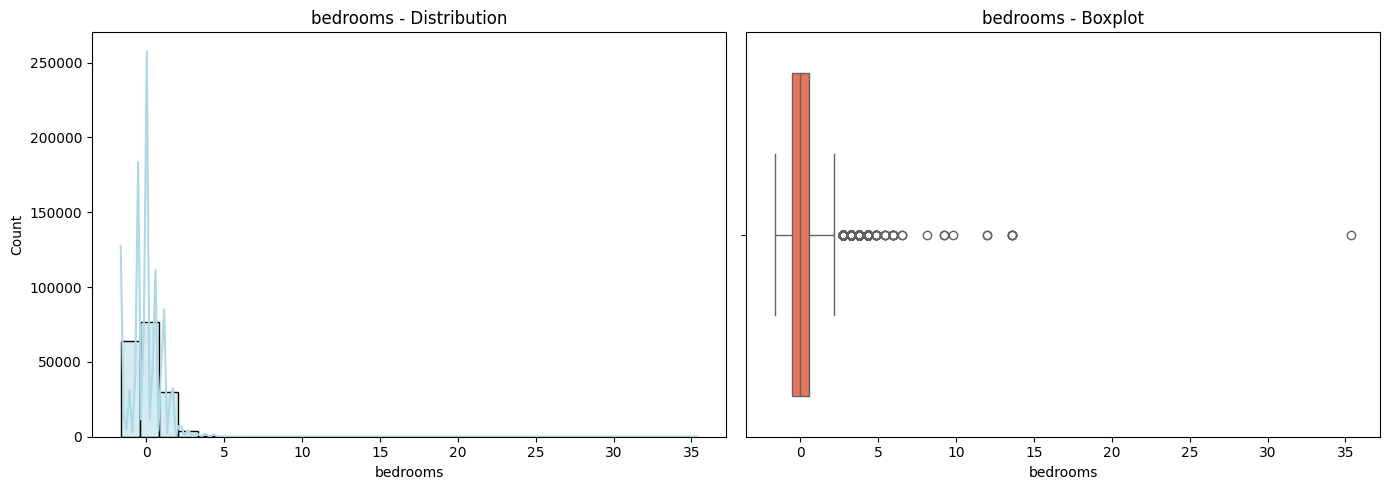


Summary Statistics for bedrooms:

count    174559.000000
mean          0.000019
std           1.000006
min          -1.633683
25%          -0.545313
50%          -0.001128
75%           0.543056
max          35.370887
Name: bedrooms, dtype: float64
------------------------------------------------------------


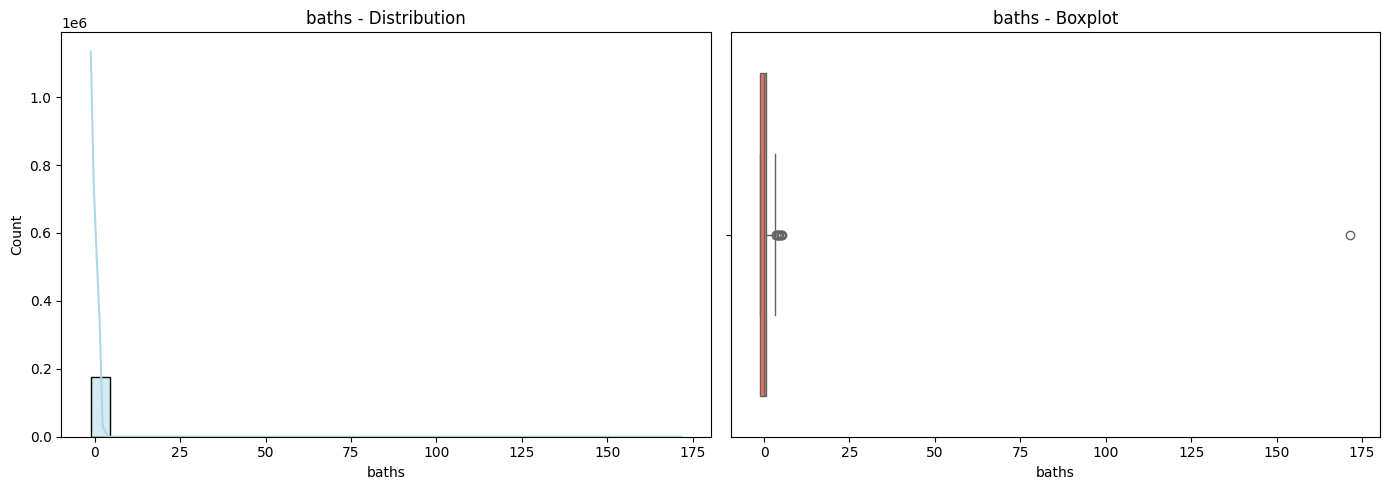


Summary Statistics for baths:

count    174559.000000
mean          0.000006
std           1.000017
min          -1.160106
25%          -1.160106
50%           0.126176
75%           0.554936
max         171.630392
Name: baths, dtype: float64
------------------------------------------------------------


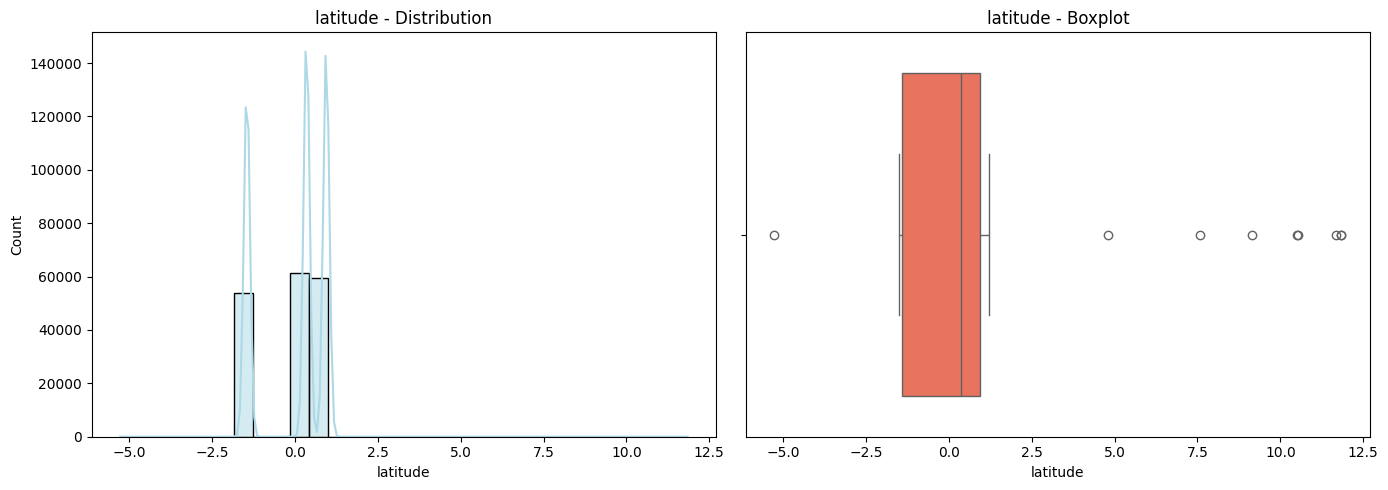


Summary Statistics for latitude:

count    174559.000000
mean         -0.000056
std           1.000015
min          -5.266298
25%          -1.423966
50%           0.354979
75%           0.930843
max          11.843488
Name: latitude, dtype: float64
------------------------------------------------------------


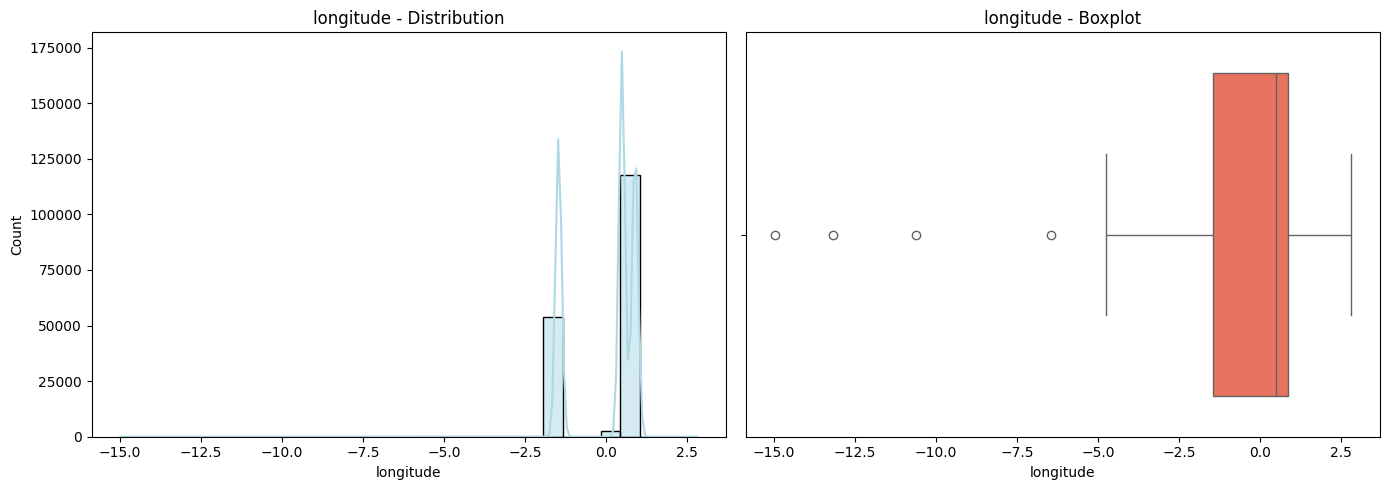


Summary Statistics for longitude:

count    174559.000000
mean         -0.000044
std           1.000025
min         -14.980405
25%          -1.452558
50%           0.482005
75%           0.854353
max           2.803455
Name: longitude, dtype: float64
------------------------------------------------------------


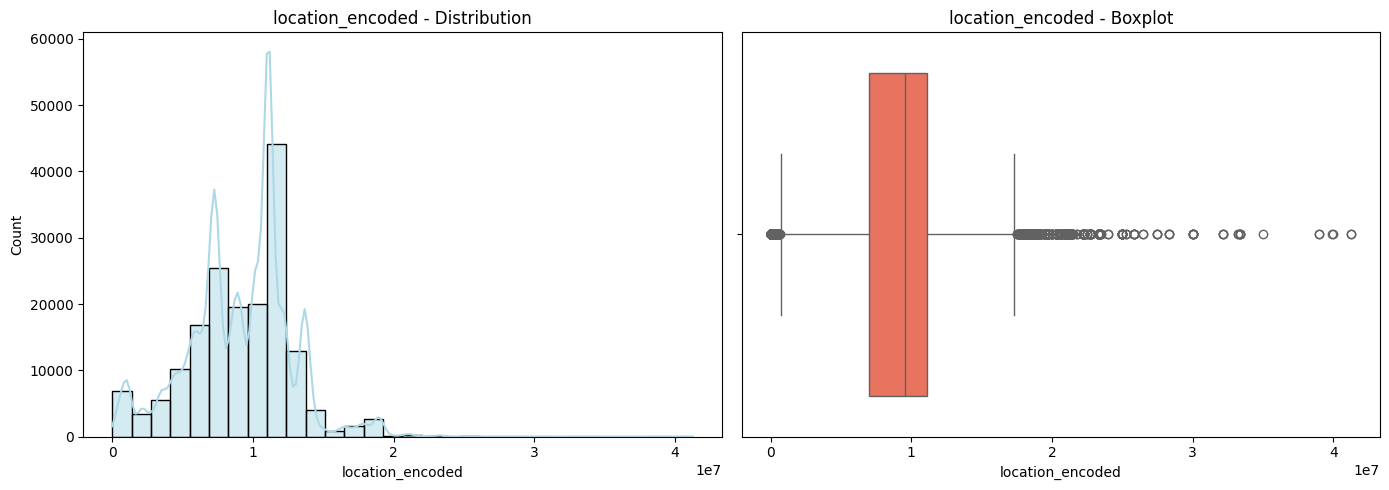


Summary Statistics for location_encoded:

count    1.745590e+05
mean     9.105953e+06
std      3.646983e+06
min      1.800000e+03
25%      6.965035e+06
50%      9.544813e+06
75%      1.113724e+07
max      4.125000e+07
Name: location_encoded, dtype: float64
------------------------------------------------------------


In [23]:
num_cols = ['price', 'price_per_sqft', 'area_sqft', 'bedrooms', 'baths', 'latitude', 'longitude', 'location_encoded']
for col in num_cols:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='lightblue', bins=30)
    plt.title(f"{col} - Distribution")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='tomato')
    plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

    print(f"\nSummary Statistics for {col}:\n")
    print(df[col].describe())
    print("-" * 60)


Univariate Analysis for Categorical Columns

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9768\396952587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


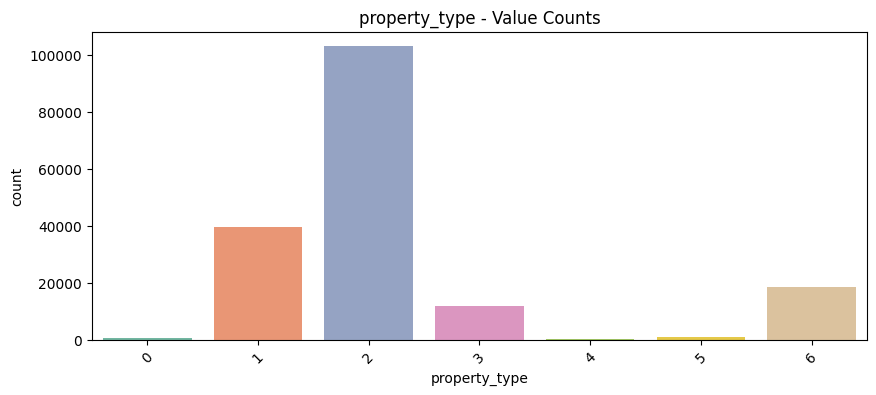


Value Counts for property_type:

property_type
2    103091
1     39501
6     18448
3     11680
5      1027
0       444
4       368
Name: count, dtype: int64
------------------------------------------------------------


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9768\396952587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


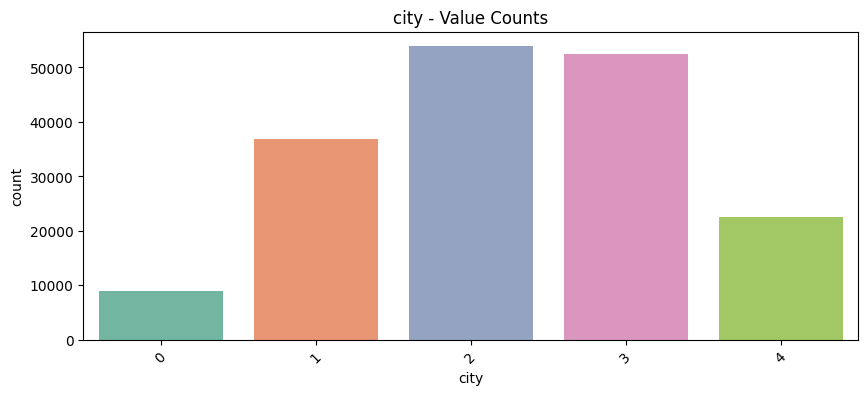


Value Counts for city:

city
2    53886
3    52465
1    36916
4    22428
0     8864
Name: count, dtype: int64
------------------------------------------------------------


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9768\396952587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


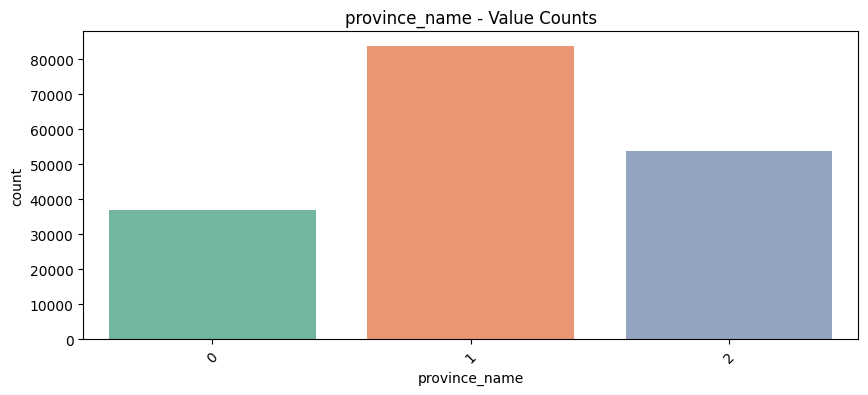


Value Counts for province_name:

province_name
1    83757
2    53886
0    36916
Name: count, dtype: int64
------------------------------------------------------------


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9768\396952587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


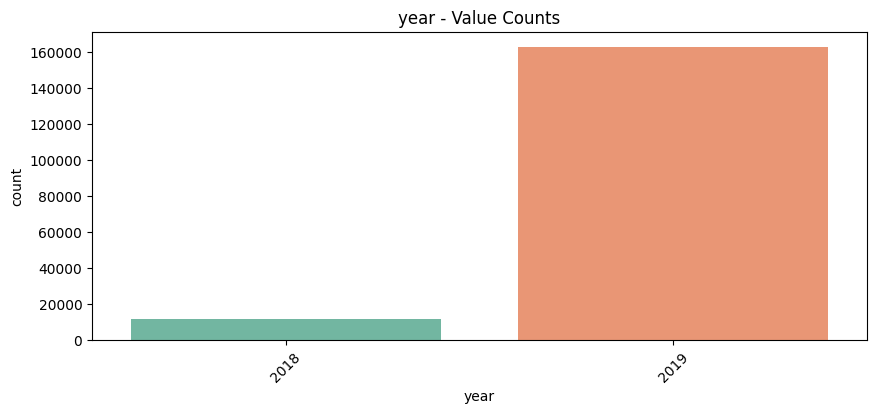


Value Counts for year:

year
2019    163031
2018     11528
Name: count, dtype: int64
------------------------------------------------------------


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9768\396952587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


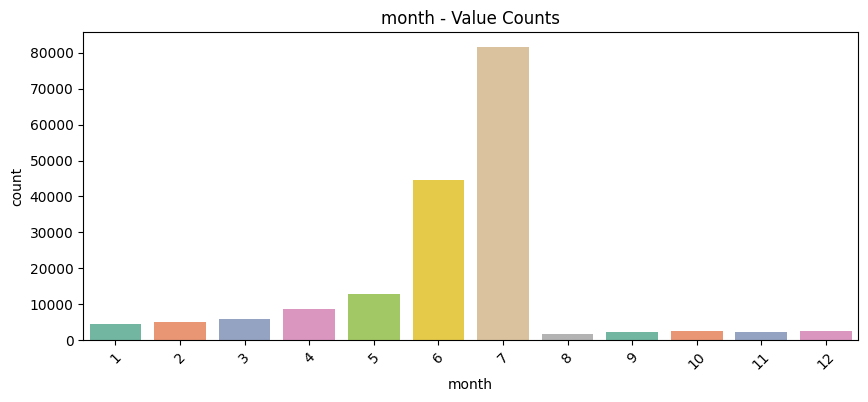


Value Counts for month:

month
7     81607
6     44501
5     12819
4      8725
3      5825
2      4978
1      4561
10     2546
12     2490
11     2430
9      2334
8      1743
Name: count, dtype: int64
------------------------------------------------------------


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9768\396952587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


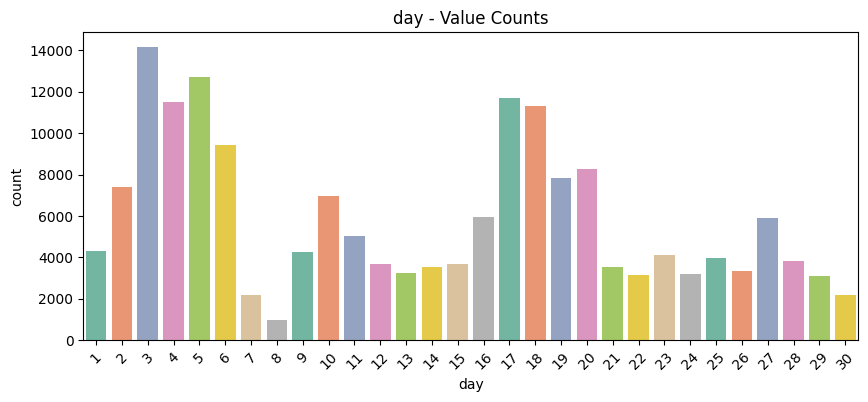


Value Counts for day:

day
3     14162
5     12696
17    11714
4     11506
18    11303
6      9411
20     8268
19     7854
2      7421
10     6962
16     5960
27     5916
11     5052
1      4321
9      4240
23     4119
25     3979
28     3811
12     3705
15     3693
21     3559
14     3552
26     3341
13     3233
24     3195
22     3142
29     3098
30     2189
7      2168
8       989
Name: count, dtype: int64
------------------------------------------------------------


In [24]:
cat_cols = ['property_type', 'city', 'province_name', 'year', 'month', 'day']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"{col} - Value Counts")
    plt.xticks(rotation=45)
    plt.show()

    print(f"\nValue Counts for {col}:\n")
    print(df[col].value_counts())
    print("-" * 60)


### Bivariate Analysis

In [25]:
def plot_graph(x,y):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=x, y=y, data=df, alpha=0.6)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

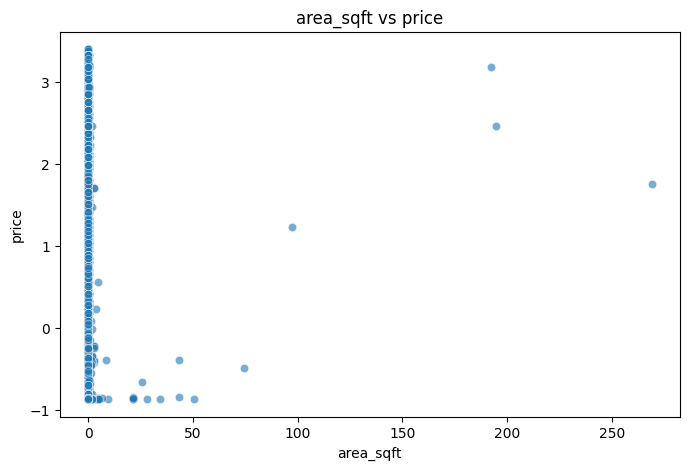

In [26]:
plot_graph('area_sqft','price')

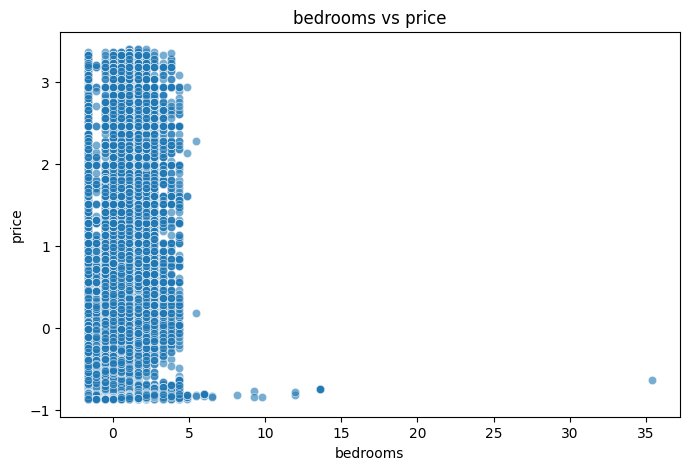

In [27]:
plot_graph('bedrooms','price')

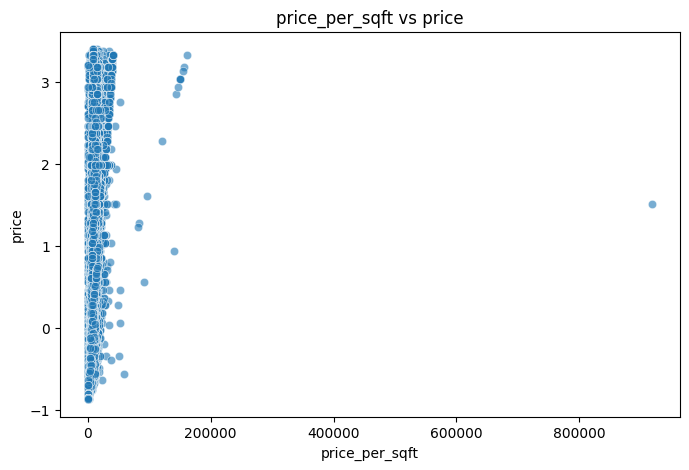

In [28]:
# Price per Sqft vs Price
plot_graph(x='price_per_sqft', y='price')

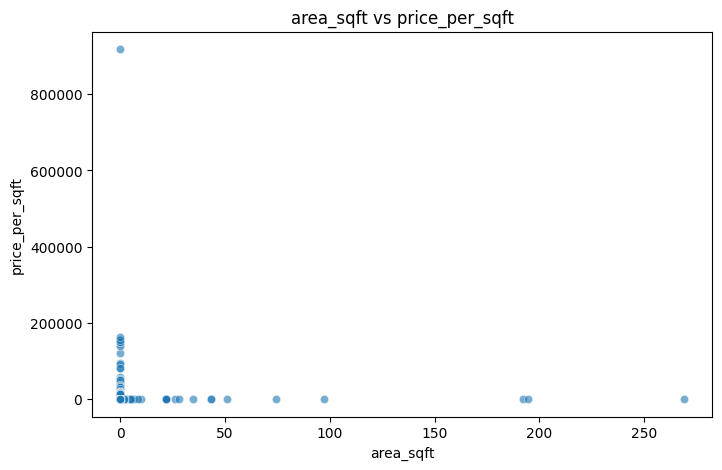

In [29]:
# Area Sqft vs Price per Sqft
plot_graph(x='area_sqft', y='price_per_sqft')

### Correlation matrix

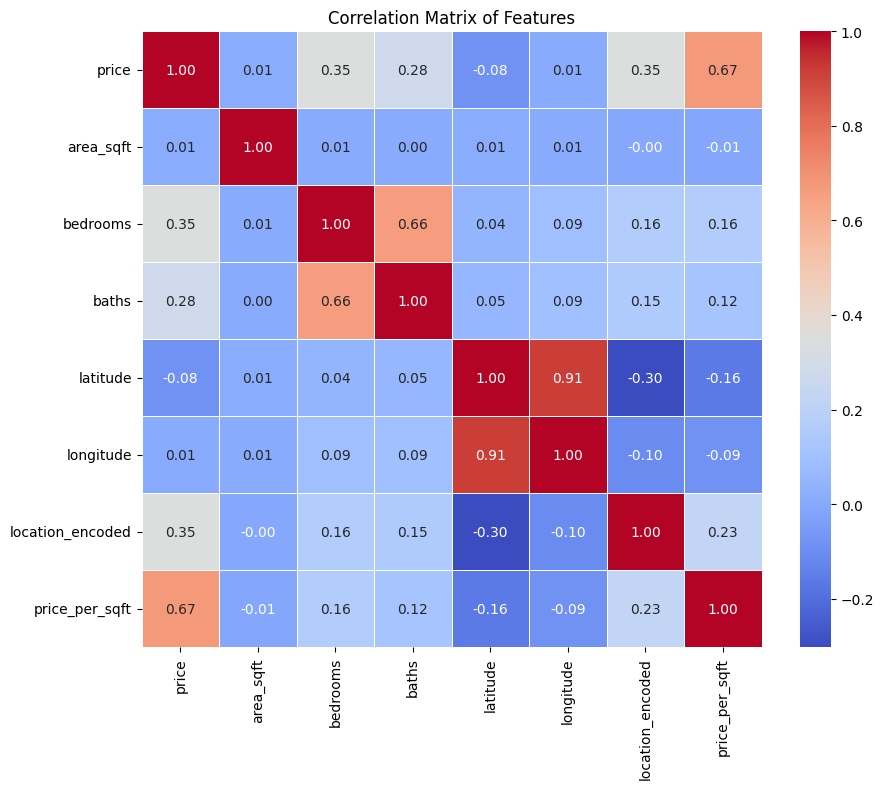

In [30]:
corr_matrix = df[['price', 'area_sqft', 'bedrooms', 'baths', 'latitude', 'longitude', 'location_encoded', 'price_per_sqft']].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

### Multiple Line Charts

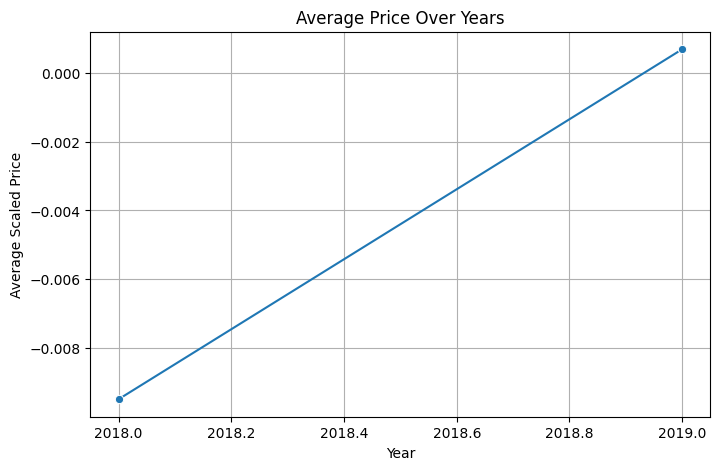

In [31]:
# Multiple Line Chart: Average Price Over Years
yearly_avg = df.groupby('year')['price'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker="o")
plt.title('Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Scaled Price')
plt.grid(True)
plt.show()

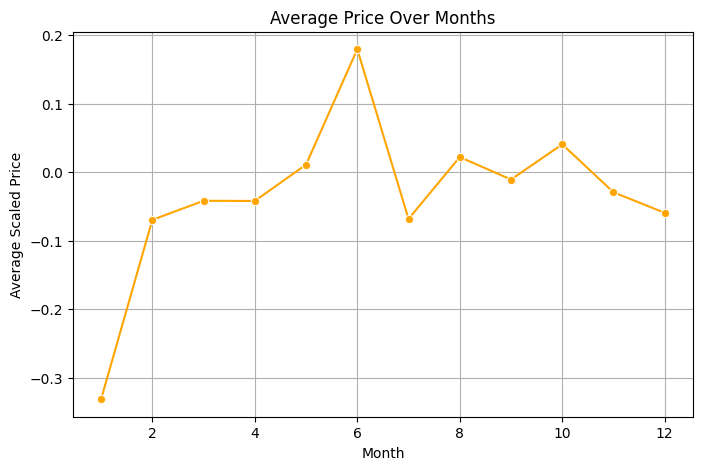

In [32]:
# Multiple Line Chart: Average Price Over Months
monthly_avg = df.groupby('month')['price'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker="o", color='orange')
plt.title('Average Price Over Months')
plt.xlabel('Month')
plt.ylabel('Average Scaled Price')
plt.grid(True)
plt.show()

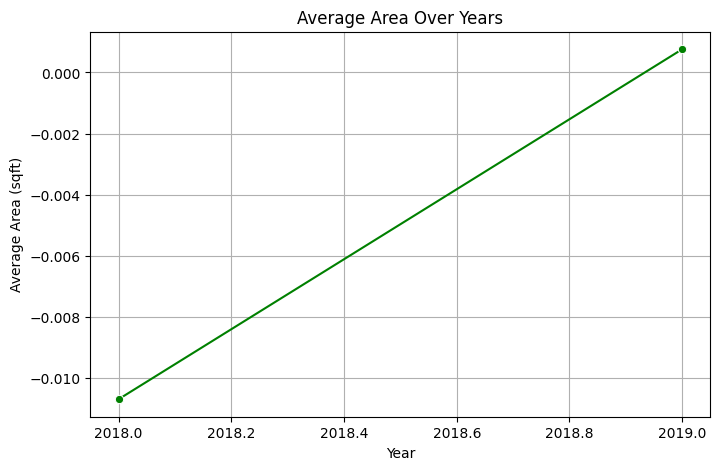

In [33]:
# Average Area (sqft) by Year
yearly_area = df.groupby('year')['area_sqft'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_area.index, y=yearly_area.values, marker="o", color='green')
plt.title('Average Area Over Years')
plt.xlabel('Year')
plt.ylabel('Average Area (sqft)')
plt.grid(True)
plt.show()

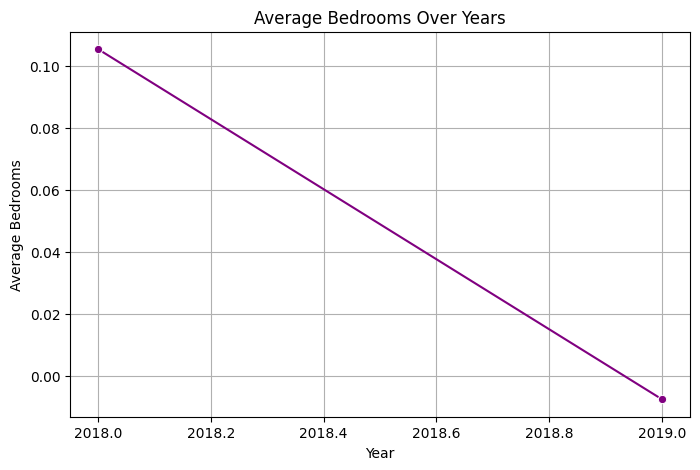

In [34]:
# Average Bedrooms by Year
yearly_bedrooms = df.groupby('year')['bedrooms'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_bedrooms.index, y=yearly_bedrooms.values, marker="o", color='purple')
plt.title('Average Bedrooms Over Years')
plt.xlabel('Year')
plt.ylabel('Average Bedrooms')
plt.grid(True)
plt.show()

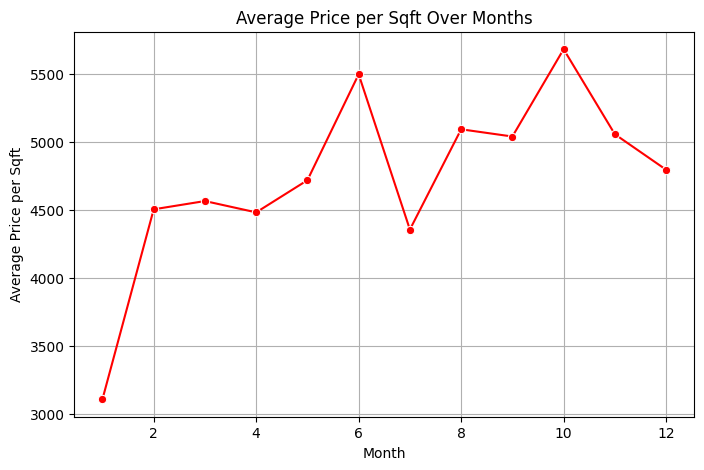

In [35]:
# Average Price per Sqft by Month
monthly_price_per_sqft = df.groupby('month')['price_per_sqft'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_price_per_sqft.index, y=monthly_price_per_sqft.values, marker="o", color='red')
plt.title('Average Price per Sqft Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Sqft')
plt.grid(True)
plt.show()

In [36]:
df.to_csv('cleaned_data_D3.csv')

In [37]:
df.head()


,property_type,price,city,province_name,latitude,longitude,baths,area_sqft,bedrooms,date_added,year,month,day,price_per_sqft,location_encoded
1,2,2.943277,3,1,0.345703,0.842852,0.983697,0.015258,1.087241,2018-10-06,2018,10,6,7346.162181,8.059476e+06
2,2,0.037551,3,1,0.364362,0.920529,-1.160106,-0.008517,-0.001128,2019-07-03,2019,7,3,3877.139569,1.095206e+07
4,2,1.133152,3,1,0.366327,0.877609,0.983697,-0.004194,1.631426,2019-04-04,2019,4,4,7012.248060,1.228830e+07
6,2,0.704439,3,1,0.342849,0.877459,1.841218,-0.010678,1.631426,2019-07-03,2019,7,3,7575.722793,1.004084e+07
7,2,2.228754,3,1,0.348013,0.852589,-1.160106,0.015258,1.087241,2019-07-03,2019,7,3,5968.756772,1.650870e+07


Machine Learning 

In [38]:
# Drop any non-feature columns like index or ID columns if necessary
# Remove these columns completely:
df = df.drop(columns=[
    'price_per_sqft',
    'year', 'month', 'day',
    'date_added',
    'location_encoded'
])


In [39]:
# Add these to your DataFrame before retraining
features = [
    'area_sqft', 'bedrooms', 'baths', 
    'latitude', 'longitude',
    'property_type', 'city', 'province_name',
]

X = df[features]
y = df['price']

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    print(f"----- {name} -----")
    print(f"R² Score      : {r2:.4f}")
    print(f"MAE           : {mae:.4f}")
    print(f"MSE           : {mse:.4f}")
    print(f"RMSE          : {rmse:.4f}\n")


In [42]:

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)


----- Linear Regression -----
R² Score      : 0.2000
MAE           : 0.6708
MSE           : 0.8166
RMSE          : 0.9036



In [43]:

# 2. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regressor", dt, X_test, y_test)


----- Decision Tree Regressor -----
R² Score      : 0.4664
MAE           : 0.3683
MSE           : 0.5446
RMSE          : 0.7380



In [44]:

# 3. Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regressor", rf, X_test, y_test)


----- Random Forest Regressor -----
R² Score      : 0.5796
MAE           : 0.3493
MSE           : 0.4291
RMSE          : 0.6551



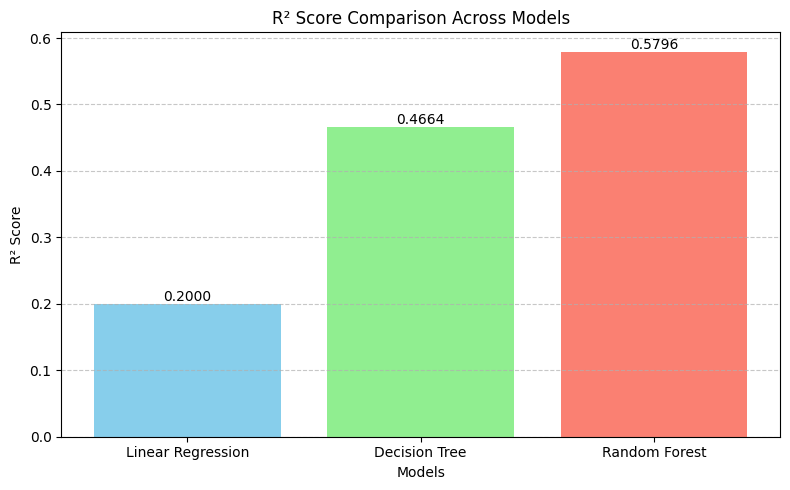

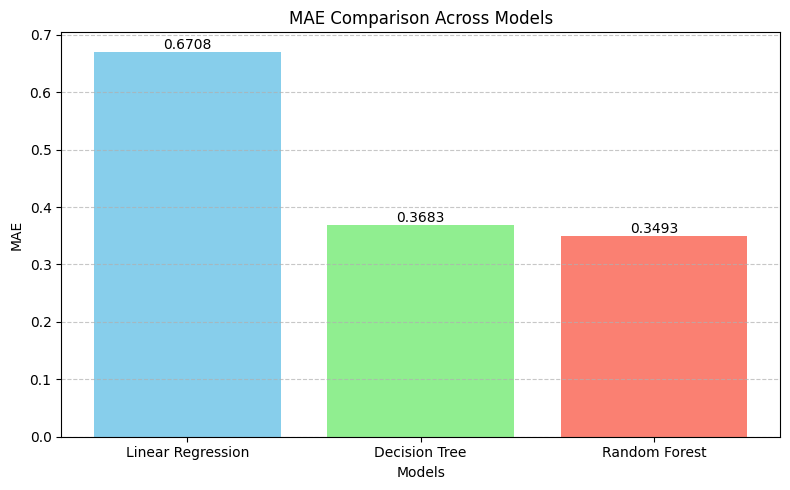

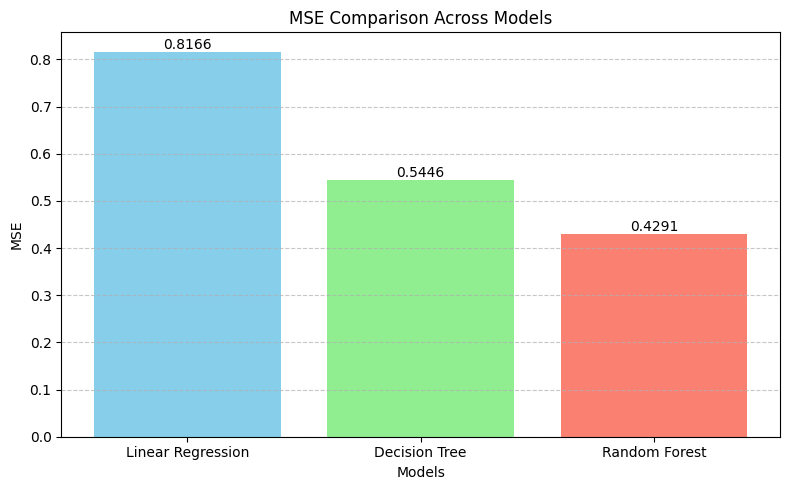

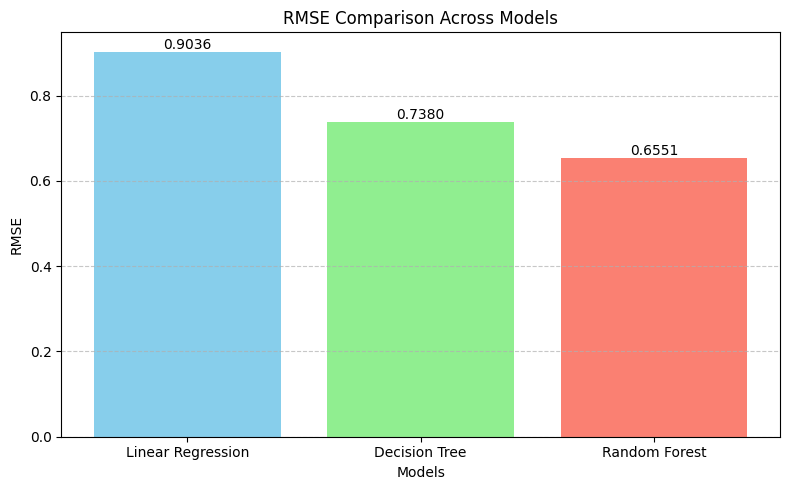

In [46]:
# Store evaluation results
results = {
    "Linear Regression": {
            "R² Score"      : 0.2000,
            "MAE"           : 0.6708,
            "MSE"           : 0.8166,
            "RMSE"          : 0.9036
    },
    "Decision Tree": {
        "R² Score"      : 0.4664,
        "MAE"           : 0.3683,
        "MSE"           : 0.5446,
        "RMSE"          : 0.7380
    },
    "Random Forest": {
        "R² Score"      : 0.5796,
        "MAE"           : 0.3493,
        "MSE"          : 0.4291,
        "RMSE"          : 0.6551

    }
}

# Prepare data for plotting
models = list(results.keys())
metrics = list(results["Linear Regression"].keys())

# Each metric plot
for metric in metrics:
    scores = [results[model][metric] for model in models]
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, scores, color=['skyblue', 'lightgreen', 'salmon'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.4f}', ha='center', va='bottom')

    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [48]:
import joblib

# Save the trained model to a file
joblib.dump(rf, 'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!
